## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [1]:
import os
import keras
import itertools
from keras.datasets import cifar10
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], pre_activate=False):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(input_layer)
            if pre_activate:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)                
        else:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            if pre_activate:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)                
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95
PRE_ACTIVATE = [True, False]

In [7]:
import tensorflow as tf
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batchSize in BATCH_SIZE:
    for preActivate in PRE_ACTIVATE:
        keras.backend.clear_session()
        print(f"batchSize: {batchSize}, preActivate: {preActivate}")
        model = build_mlp(input_shape=x_train.shape[1:], pre_activate=preActivate)
        model.summary()                
        
        optimizer = tf.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batchSize, 
              validation_data=(x_test, y_test), 
              shuffle=True)        
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]        

        exp_name_tag = "batchSize: %s, pre_activeate: %s" %(str(batchSize), preActivate)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

  

batchSize: 2, preActivate: True
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)             

C:\Users\User\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
25000/25000 [==============================] - 191s 8ms/step - loss: 2.2624 - accuracy: 0.1589 - val_loss: 2.3125 - val_accuracy: 0.2312
Epoch 2/50
25000/25000 [==============================] - 183s 7ms/step - loss: 2.2313 - accuracy: 0.1685 - val_loss: 2.3480 - val_accuracy: 0.2262
Epoch 3/50
25000/25000 [==============================] - 183s 7ms/step - loss: 2.2250 - accuracy: 0.1716 - val_loss: 2.2506 - val_accuracy: 0.2421
Epoch 4/50
25000/25000 [==============================] - 182s 7ms/step - loss: 2.2241 - accuracy: 0.1722 - val_loss: 2.6277 - val_accuracy: 0.2202
Epoch 5/50
25000/25000 [==============================] - 183s 7ms/step - loss: 2.2245 - accuracy: 0.1731 - val_loss: 2.4344 - val_accuracy: 0.2277
Epoch 6/50
25000/25000 [==============================] - 183s 7ms/step - loss: 2.2367 - accuracy: 0.1658 - val_loss: 2.6089 - val_accuracy: 0.2051
Epoch 7/50
25000/25000 [==============================] - 182s 7ms/step - loss: 2.2382 - accuracy: 0.1642 - val_

Epoch 1/50
25000/25000 [==============================] - 283s 11ms/step - loss: 2.3096 - accuracy: 0.1465 - val_loss: 2.1893 - val_accuracy: 0.2249
Epoch 2/50
25000/25000 [==============================] - 270s 11ms/step - loss: 2.2423 - accuracy: 0.1596 - val_loss: 2.2311 - val_accuracy: 0.2156
Epoch 3/50
25000/25000 [==============================] - 183s 7ms/step - loss: 2.2376 - accuracy: 0.1629 - val_loss: 2.4316 - val_accuracy: 0.2142
Epoch 4/50
25000/25000 [==============================] - 183s 7ms/step - loss: 2.2336 - accuracy: 0.1658 - val_loss: 3.3177 - val_accuracy: 0.1816
Epoch 5/50
25000/25000 [==============================] - 184s 7ms/step - loss: 2.2445 - accuracy: 0.1583 - val_loss: 148.3731 - val_accuracy: 0.1740
Epoch 6/50
25000/25000 [==============================] - 197s 8ms/step - loss: 2.2449 - accuracy: 0.1578 - val_loss: 226.9878 - val_accuracy: 0.1806
Epoch 7/50
25000/25000 [==============================] - 244s 10ms/step - loss: 2.2354 - accuracy: 0.1654

Epoch 1/50
3125/3125 [==============================] - 25s 8ms/step - loss: 1.7113 - accuracy: 0.3895 - val_loss: 1.5675 - val_accuracy: 0.4451
Epoch 2/50
3125/3125 [==============================] - 24s 8ms/step - loss: 1.5214 - accuracy: 0.4603 - val_loss: 1.5258 - val_accuracy: 0.4669
Epoch 3/50
3125/3125 [==============================] - 24s 8ms/step - loss: 1.4288 - accuracy: 0.4927 - val_loss: 1.4415 - val_accuracy: 0.4949
Epoch 4/50
3125/3125 [==============================] - 24s 8ms/step - loss: 1.3694 - accuracy: 0.5143 - val_loss: 1.4191 - val_accuracy: 0.4961
Epoch 5/50
3125/3125 [==============================] - 24s 8ms/step - loss: 1.3186 - accuracy: 0.5326 - val_loss: 1.3992 - val_accuracy: 0.5053
Epoch 6/50
3125/3125 [==============================] - 24s 8ms/step - loss: 1.2722 - accuracy: 0.5489 - val_loss: 1.3828 - val_accuracy: 0.5137
Epoch 7/50
3125/3125 [==============================] - 24s 8ms/step - loss: 1.2340 - accuracy: 0.5628 - val_loss: 1.3806 - val_ac

Epoch 1/50
3125/3125 [==============================] - 24s 7ms/step - loss: 1.8047 - accuracy: 0.3578 - val_loss: 1.6432 - val_accuracy: 0.4177
Epoch 2/50
3125/3125 [==============================] - 23s 7ms/step - loss: 1.6410 - accuracy: 0.4152 - val_loss: 1.5808 - val_accuracy: 0.4346
Epoch 3/50
3125/3125 [==============================] - 23s 7ms/step - loss: 1.5901 - accuracy: 0.4334 - val_loss: 1.5268 - val_accuracy: 0.4526
Epoch 4/50
3125/3125 [==============================] - 23s 7ms/step - loss: 1.5494 - accuracy: 0.4498 - val_loss: 1.7452 - val_accuracy: 0.3826
Epoch 5/50
3125/3125 [==============================] - 23s 7ms/step - loss: 1.5143 - accuracy: 0.4635 - val_loss: 1.5914 - val_accuracy: 0.4445
Epoch 6/50
3125/3125 [==============================] - 23s 7ms/step - loss: 1.4989 - accuracy: 0.4678 - val_loss: 1.5614 - val_accuracy: 0.4463
Epoch 7/50
3125/3125 [==============================] - 23s 7ms/step - loss: 1.4825 - accuracy: 0.4736 - val_loss: 1.4783 - val_ac

Epoch 1/50
1563/1563 [==============================] - 15s 8ms/step - loss: 1.6718 - accuracy: 0.4045 - val_loss: 1.5948 - val_accuracy: 0.4274
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4409 - accuracy: 0.4895 - val_loss: 1.4911 - val_accuracy: 0.4670
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3369 - accuracy: 0.5254 - val_loss: 1.5622 - val_accuracy: 0.4469
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2580 - accuracy: 0.5544 - val_loss: 1.4277 - val_accuracy: 0.4882
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1880 - accuracy: 0.5790 - val_loss: 1.6132 - val_accuracy: 0.4506
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1348 - accuracy: 0.5993 - val_loss: 1.4253 - val_accuracy: 0.5012
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0788 - accuracy: 0.6185 - val_loss: 1.5565 - val_ac

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7372 - accuracy: 0.3864 - val_loss: 1.6209 - val_accuracy: 0.4233
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5360 - accuracy: 0.4574 - val_loss: 1.5899 - val_accuracy: 0.4397
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4632 - accuracy: 0.4818 - val_loss: 1.5148 - val_accuracy: 0.4663
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4093 - accuracy: 0.5025 - val_loss: 1.5140 - val_accuracy: 0.4668
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3813 - accuracy: 0.5094 - val_loss: 1.5425 - val_accuracy: 0.4583
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3478 - accuracy: 0.5233 - val_loss: 1.4577 - val_accuracy: 0.4825
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3133 - accuracy: 0.5327 - val_loss: 1.5098 - val_ac

Epoch 1/50
391/391 [==============================] - 5s 12ms/step - loss: 1.7250 - accuracy: 0.3928 - val_loss: 1.6448 - val_accuracy: 0.4198
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 1.4478 - accuracy: 0.4889 - val_loss: 1.5894 - val_accuracy: 0.4434
Epoch 3/50
391/391 [==============================] - 5s 12ms/step - loss: 1.3314 - accuracy: 0.5339 - val_loss: 1.5349 - val_accuracy: 0.4612
Epoch 4/50
391/391 [==============================] - 5s 12ms/step - loss: 1.2368 - accuracy: 0.5697 - val_loss: 1.4665 - val_accuracy: 0.4829
Epoch 5/50
391/391 [==============================] - 5s 12ms/step - loss: 1.1559 - accuracy: 0.5976 - val_loss: 1.5510 - val_accuracy: 0.4625
Epoch 6/50
391/391 [==============================] - 5s 12ms/step - loss: 1.0823 - accuracy: 0.6259 - val_loss: 1.5794 - val_accuracy: 0.4627
Epoch 7/50
391/391 [==============================] - 5s 12ms/step - loss: 1.0137 - accuracy: 0.6500 - val_loss: 1.5750 - val_accuracy: 0.4531

Epoch 1/50
391/391 [==============================] - 5s 12ms/step - loss: 1.7605 - accuracy: 0.3876 - val_loss: 1.6416 - val_accuracy: 0.4191
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 1.4907 - accuracy: 0.4747 - val_loss: 1.5650 - val_accuracy: 0.4438
Epoch 3/50
391/391 [==============================] - 5s 12ms/step - loss: 1.3899 - accuracy: 0.5118 - val_loss: 1.4942 - val_accuracy: 0.4673
Epoch 4/50
391/391 [==============================] - 5s 12ms/step - loss: 1.3171 - accuracy: 0.5354 - val_loss: 1.5008 - val_accuracy: 0.4659
Epoch 5/50
391/391 [==============================] - 5s 12ms/step - loss: 1.2555 - accuracy: 0.5576 - val_loss: 1.5115 - val_accuracy: 0.4644
Epoch 6/50
391/391 [==============================] - 5s 12ms/step - loss: 1.2091 - accuracy: 0.5742 - val_loss: 1.4777 - val_accuracy: 0.4802
Epoch 7/50
391/391 [==============================] - 5s 12ms/step - loss: 1.1683 - accuracy: 0.5902 - val_loss: 1.4713 - val_accuracy: 0.4926

Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 1.8506 - accuracy: 0.3509 - val_loss: 1.7759 - val_accuracy: 0.3884
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5391 - accuracy: 0.4607 - val_loss: 1.5910 - val_accuracy: 0.4409
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 1.4231 - accuracy: 0.5013 - val_loss: 1.5131 - val_accuracy: 0.4636
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3370 - accuracy: 0.5354 - val_loss: 1.4956 - val_accuracy: 0.4700
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.2635 - accuracy: 0.5604 - val_loss: 1.4613 - val_accuracy: 0.4799
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1981 - accuracy: 0.5867 - val_loss: 1.5108 - val_accuracy: 0.4693
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1379 - accuracy: 0.6068 - val_loss: 1.4593 - val_accuracy: 0.4882

Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 1.8476 - accuracy: 0.3619 - val_loss: 1.7735 - val_accuracy: 0.3697
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5335 - accuracy: 0.4642 - val_loss: 1.5876 - val_accuracy: 0.4402
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4338 - accuracy: 0.4949 - val_loss: 1.5561 - val_accuracy: 0.4529
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.3650 - accuracy: 0.5224 - val_loss: 1.5022 - val_accuracy: 0.4694
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 1.3069 - accuracy: 0.5424 - val_loss: 1.5518 - val_accuracy: 0.4491
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.2516 - accuracy: 0.5629 - val_loss: 1.4848 - val_accuracy: 0.4753
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 1.2032 - accuracy: 0.5835 - val_loss: 1.4781 - val_accuracy: 0.4733

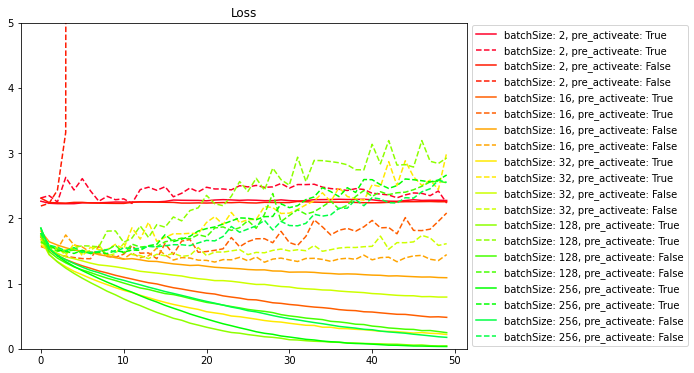

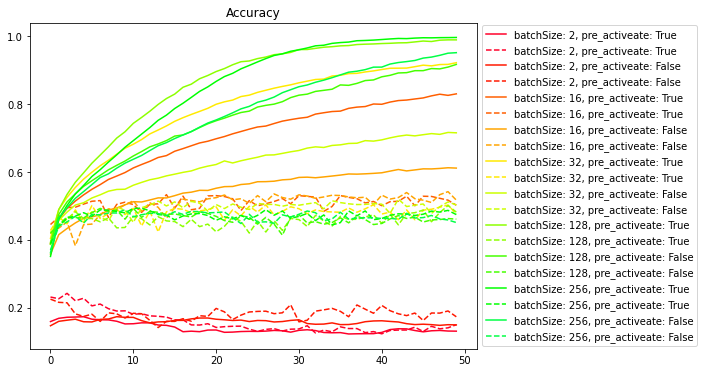

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [ scalarMap.to_rgba(i) for i in range(NUM_COLORS)]
"""Code Here
將結果繪出
"""

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

1.BatchSize在16時表現相對最好，2的Accuracy過低，而32以上都產生Overfitting
2.有將BN放在Activation後的相對來說Overfitting程度較低
